# QLSTM Testing
This document conducts basic test fits on time series curves. Later we also introduce noise to the equation.

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from q_lstm_tf_v2_data_reuploaded import QLSTM
from quantum.util.dataset_creator import create_dataset
import tensorflow.experimental.numpy as np
tf.keras.backend.set_floatx('float64')
import pennylane as qml

dtype_global = tf.float64


Using Quantum Device: <lightning.qubit device (wires=2) at 0x1e7271535d0>


Lets start by fitting a simple sinusoid:

In [2]:
X, y = create_dataset(tf.sin, sample_count=100, dtype=dtype_global, end=6*np.pi)
dataset = tf.data.Dataset.from_tensor_slices((X, y))

dataset = dataset.shuffle(buffer_size=1000)  # Shuffle the data
dataset = dataset.batch(32)                 # Batch size of 32
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for performance

qubits = 2
dev = qml.device('lightning.qubit', wires=qubits)

### Plot Train data

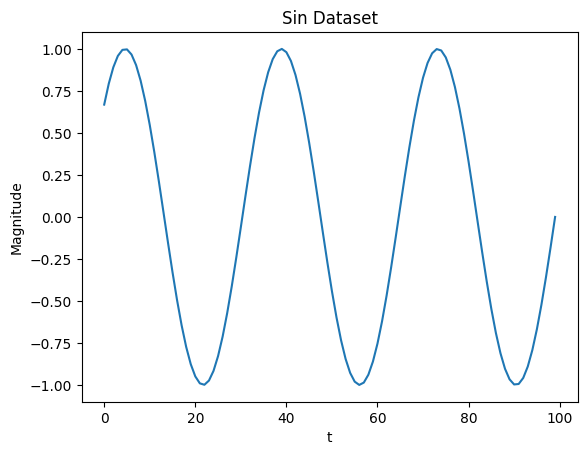

In [3]:
plt.plot(y)
plt.title("Sin Dataset")
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.show()

### Create trainers for LSTM and QLSTM

In [4]:

model = tf.keras.Sequential([QLSTM(1, dev=dev, layers=4, wires=qubits, dtype=dtype_global, return_sequences=False)])
optimizer = tf.keras.optimizers.Adam(learning_rate=.01)

model.compile(optimizer=optimizer, loss='mse')
history_q = model.fit(
    dataset,
    validation_data=dataset,
    epochs=50,
    callbacks=tf.keras.callbacks.EarlyStopping(monitor="auto", verbose=1, patience=2),
    )


Epoch 1/50

tf.Tensor(
[[ 4.67008047e-04  4.49416731e-04  1.66981544e-04 -3.00869258e-03
  -9.20651546e-03  8.69843027e-03]
 [ 6.62374422e-04  5.40282106e-04  4.54072235e-04  5.27422025e-03
  -9.18359063e-03  8.52083557e-03]
 [ 6.77762792e-04  4.51550574e-04 -3.01869044e-05 -2.32943453e-03
  -6.66608919e-03  6.64628472e-03]
 [ 8.38536946e-04 -1.03347948e-04  4.35558837e-19 -1.04278721e-02
  -9.99791675e-03  0.00000000e+00]], shape=(4, 6), dtype=float64)
tf.Tensor(
[[-8.39679400e-04 -8.22010907e-04 -1.67001229e-04 -2.33425964e-02
   1.60965720e-03  1.29731625e-02]
 [-4.18643709e-04 -1.22264024e-03  1.24992042e-04 -1.98003177e-02
   5.74817323e-03  1.87053858e-02]
 [-1.11448615e-03 -8.18804488e-04  7.73754014e-04 -7.26850952e-03
   2.13629048e-02  8.08457281e-03]
 [-1.25965928e-03 -1.34370936e-04 -1.72112949e-21 -1.30334885e-02
   1.91346395e-02  0.00000000e+00]], shape=(4, 6), dtype=float64)
tf.Tensor(
[[ 2.13688561e-04  4.72583023e-03  2.92943429e-03 -8.78439398e-03
   1.35301684e-03 

{'loss': [0.4451343082924166, 0.3855711982520284, 0.3290333463399434, 0.2797877328124351, 0.23913403945809553, 0.206420895928044, 0.1797548450494932, 0.1601708084872413, 0.13769469921710184, 0.11980919277128621, 0.10636439156625524, 0.09294243723099463, 0.08094104062869263, 0.07251170355304364, 0.06409884899959443, 0.055674239213435985, 0.046836059663042925, 0.04193575041423811, 0.036495111843807916, 0.03282049077855559, 0.02852661463161478, 0.02661858803028664, 0.024321728924585916, 0.021002826751326177, 0.020620727448978318, 0.018926185989030137, 0.01677152072642298, 0.016100358938365113, 0.014876063746331953, 0.014232894413372476, 0.013172884844317731, 0.012454019327791362, 0.01236766761140047, 0.011801756037970094, 0.011118566857073315, 0.010226354071213369, 0.010323669673973367, 0.009295609988888086, 0.009050128063981597, 0.009030394200309811, 0.008491728584147604, 0.008024719119945704, 0.007810353365726651, 0.007303373037943447, 0.006819409555078287, 0.007018126962629324, 0.00602

Text(0.5, 1.0, 'Sine loss of QLSTM with 2')

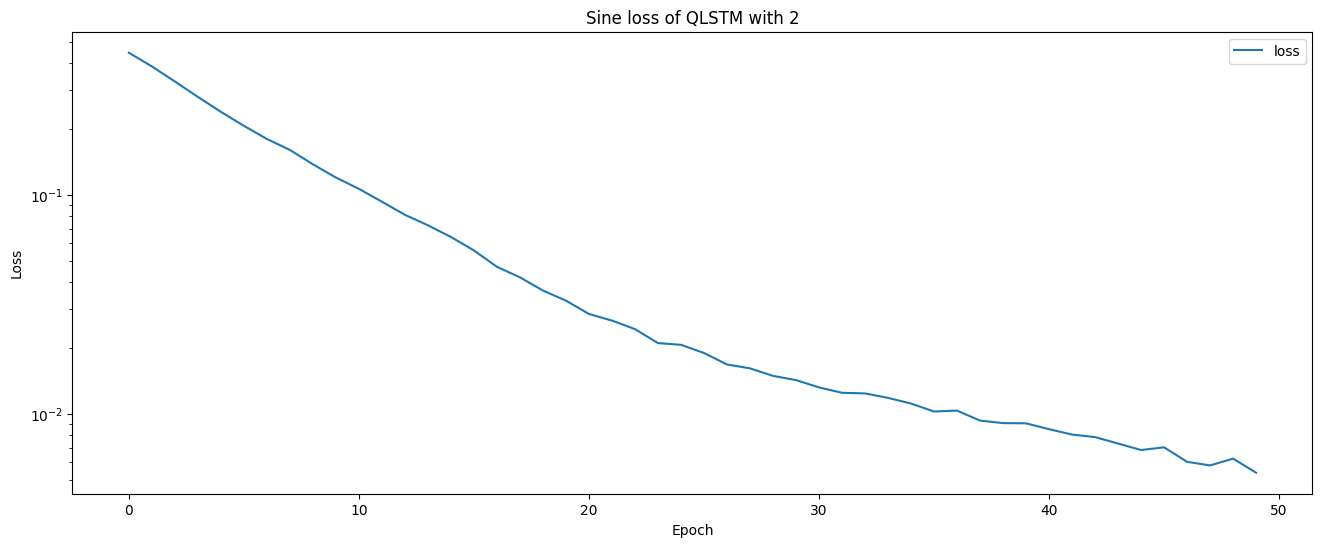

In [5]:
metrics = history_q.history
print(metrics)
plt.figure(figsize=(16,6))
plt.plot(history_q.epoch, metrics['loss'])
plt.legend(['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title(f"Sine loss of QLSTM with {qubits}")

In [6]:
model = tf.keras.Sequential([tf.keras.layers.LSTM(128, dtype=dtype_global, return_sequences=False)])
model.compile(optimizer='adam', loss='mse')
history = model.fit(dataset, epochs=300, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),)


Epoch 1/300
Tensor("IdentityN:0", shape=(1, 512), dtype=float64)
Tensor("IdentityN:1", shape=(128, 512), dtype=float64)
Tensor("IdentityN:2", shape=(512,), dtype=float64)
Tensor("IdentityN:0", shape=(1, 512), dtype=float64)
Tensor("IdentityN:1", shape=(128, 512), dtype=float64)
Tensor("IdentityN:2", shape=(512,), dtype=float64)
4/4 [==============================] - 2s 4ms/step - loss: 0.5139
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5055
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4969
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4885
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4796
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4707
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4603
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4490
Epoch 9/300
4/4 [==============================] - 0s 4ms

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
Total params: 66560 (520.00 KB)
Trainable params: 66560 (520.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 1.0, 'Sine loss')

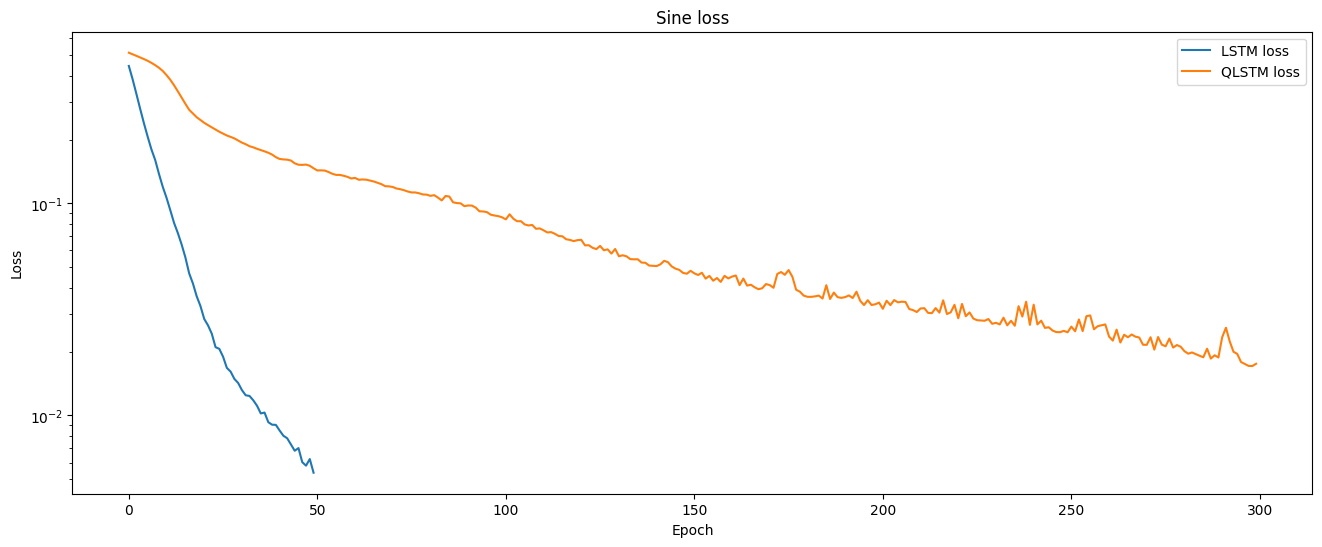

In [8]:
metrics = history.history
q_metrics = history_q.history
plt.figure(figsize=(16,6))
plt.plot(history_q.epoch, q_metrics['loss'])
plt.plot(history.epoch, metrics['loss'])

plt.legend(['LSTM loss', 'QLSTM loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title(f"Sine loss")

In [9]:
X, y = create_dataset(lambda x: tf.exp(-0.25*x) * tf.sin(4.0*x), sample_count=100, dtype=dtype_global)

dataset_basel = tf.data.Dataset.from_tensor_slices((X, y))

dataset_basel = dataset_basel.shuffle(buffer_size=1000)  # Shuffle the data
dataset_basel = dataset_basel.batch(100)                 # Batch size of 32
dataset_basel = dataset_basel.prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for performance

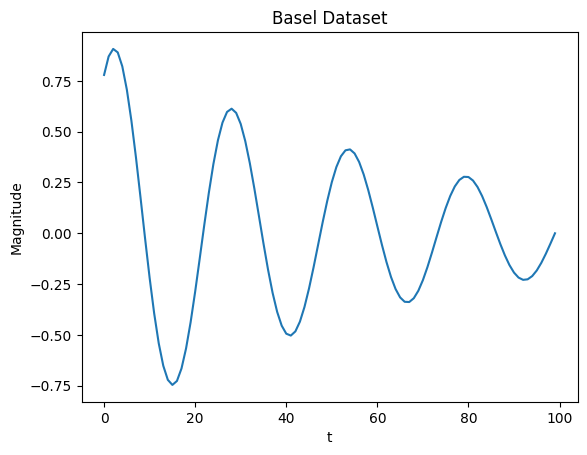

In [10]:
plt.plot(y)
plt.title("Basel Dataset")
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.show()

In [11]:
model = tf.keras.Sequential([QLSTM(1, dev=dev, layers=2, wires=qubits, dtype=dtype_global, return_sequences=False)])
optimizer = tf.keras.optimizers.Adam(learning_rate=.1)

model.compile(optimizer=optimizer, loss='mse')

history_q = model.fit(dataset_basel, epochs=100, callbacks=tf.keras.callbacks.EarlyStopping(monitor="auto", verbose=1, patience=2),)
print(model.summary())


Epoch 1/100
tf.Tensor(
[[ 7.43805017e-04 -1.08167148e-03  9.74403273e-04  1.05495676e-01
   3.26482528e-01  7.44556889e-02]
 [ 1.17159536e-03 -1.18075031e-03 -3.76529841e-20 -7.28982112e-02
   3.33511031e-01  0.00000000e+00]], shape=(2, 6), dtype=float64)
tf.Tensor(
[[ 2.46341156e-03 -2.53888336e-03 -9.25922244e-04  3.21748295e-01
  -2.77541111e-01  5.43469566e-02]
 [ 1.41388674e-03 -4.68954844e-03  8.29734932e-19  3.36634577e-01
  -2.84413898e-01  0.00000000e+00]], shape=(2, 6), dtype=float64)
tf.Tensor(
[[ 2.10210137e-03 -5.76990597e-03  2.36815865e-03 -1.60517907e-01
   2.32235574e-01 -2.71908902e-01]
 [ 2.49929696e-03 -5.09845267e-03 -1.02538507e-18 -1.48955495e-01
   2.77268134e-01  0.00000000e+00]], shape=(2, 6), dtype=float64)
tf.Tensor(
[[-3.47591505e-03 -4.38202147e-04  1.06844314e-03  2.86776452e-01
   1.42056011e-01  1.19401132e-01]
 [-1.69435293e-03 -3.93806078e-03 -1.61067107e-18  3.71337360e-01
   1.38505041e-02  0.00000000e+00]], shape=(2, 6), dtype=float64)
tf.Tensor(
[

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 qlstm_1 (QLSTM)             (None, 1)                 115       
                                                                 
Total params: 115 (920.00 Byte)
Trainable params: 115 (920.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model = tf.keras.Sequential([tf.keras.layers.LSTM(512, dtype=dtype_global, return_sequences=False)])
model.compile(optimizer='adam', loss='mse')
history = model.fit(dataset_basel, epochs=300, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),)

Epoch 1/300
Tensor("IdentityN:0", shape=(1, 2048), dtype=float64)
Tensor("IdentityN:1", shape=(512, 2048), dtype=float64)
Tensor("IdentityN:2", shape=(2048,), dtype=float64)
Tensor("IdentityN:0", shape=(1, 2048), dtype=float64)
Tensor("IdentityN:1", shape=(512, 2048), dtype=float64)
Tensor("IdentityN:2", shape=(2048,), dtype=float64)
1/1 [==============================] - 2s 2s/step - loss: 0.1497
Epoch 2/300
1/1 [==============================] - 0s 86ms/step - loss: 0.1491
Epoch 3/300
1/1 [==============================] - 0s 48ms/step - loss: 0.1484
Epoch 4/300
1/1 [==============================] - 0s 47ms/step - loss: 0.1477
Epoch 5/300
1/1 [==============================] - 0s 47ms/step - loss: 0.1470
Epoch 6/300
1/1 [==============================] - 0s 47ms/step - loss: 0.1462
Epoch 7/300
1/1 [==============================] - 0s 47ms/step - loss: 0.1454
Epoch 8/300
1/1 [==============================] - 0s 48ms/step - loss: 0.1445
Epoch 9/300
1/1 [=============================

ValueError: x and y must have same first dimension, but have shapes (100,) and (300,)

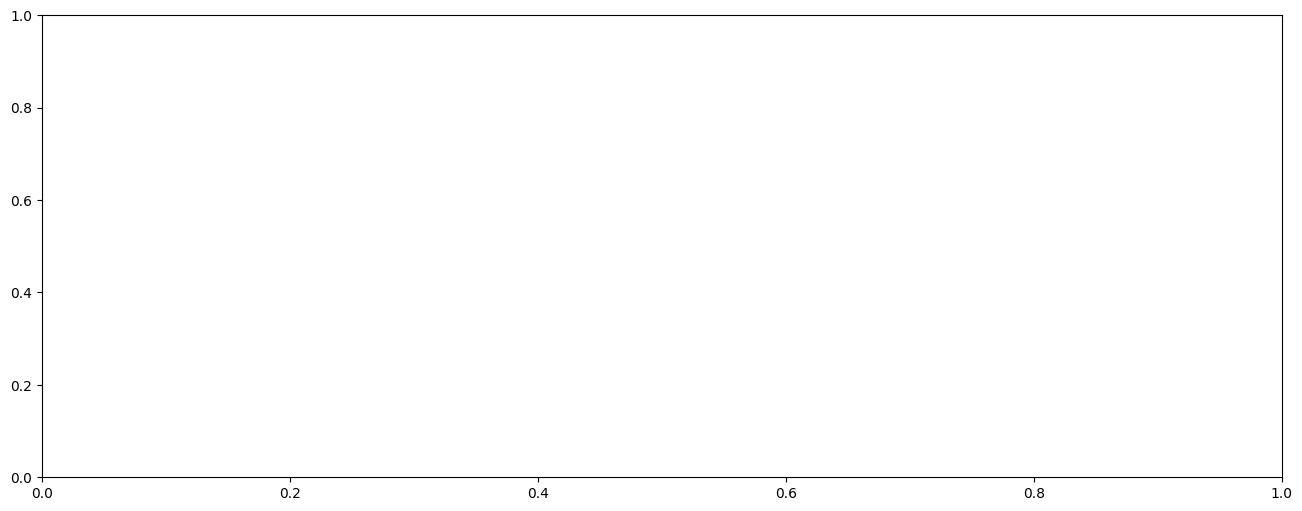

In [14]:
metrics = history.history
q_metrics = history_q.history
plt.figure(figsize=(16,6))
plt.plot(history_q.epoch, metrics['loss'], q_metrics['loss'])

plt.legend(['LSTM loss', 'QLSTM loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title(f"Sine Exponential loss")